In [480]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [481]:
def month(s: str) -> str:
    return s[5:7]

def year(s: str) -> str:
    return s[:4]

def rename_month(s: str) -> str:
    month = {'05': 'Май', '06': 'Июнь', '07': 'Июль', '08': 'Август', '09': 'Сентябрь', '10': 'Октябрь', '11': 'Ноябрь'}
    return(month[s])

def order_month(index: int) -> str:
    if index < 129:
        return '05'
    if index >= 129 and index < 258:
        return '06'
    if index >= 258 and index < 369:
        return '07'
    if index >= 369 and index < 484:
        return '08'
    if index >= 484 and index < 594:
        return '09'
    if index >= 594:
        return '10'

def day(s: str) -> str:
    return s[8:10]

def sale_bonus(s: float) -> float:
    return s / 100 * 7

def sale_bonus1(s: float) -> float:
    if s > 10000:
        return s / 100 * 5
    else:
        return s / 100 * 3

def del_nan(s):
    if s.isna() == True:
        return 0
    else:
        return s

In [482]:
df = pd.read_excel('data.xlsx')

In [483]:

df.index.rename('new_index', inplace= True )
df.reset_index(inplace= True )
df.head()
type(df.index[0])

int

In [484]:
df['order_month'] = df.loc[df.status.isna() == False].new_index.apply(order_month)

In [485]:
df.query("order_month == '07' and status != 'ПРОСРОЧЕНО'").agg({'sum': sum})

sum    859896.47
dtype: float64

In [488]:
len(df.receiving_date.unique())
df['receiving_date']=df['receiving_date'].astype(str)
df['receiving_month'] = df.loc[df.receiving_date.isna() == False].receiving_date.apply(month)
df['receiving_year'] = df.loc[df.receiving_date.isna() == False].receiving_date.apply(year)
df['receiving_day'] = df.loc[df.receiving_date.isna() == False].receiving_date.apply(day)
df = df.rename(columns={'new/current': 'new_current'})
df.query("order_month == '07'  and status != 'ПРОСРОЧЕНО'").agg({'sum': sum})

sum    859896.47
dtype: float64

In [489]:
profit = df.query("order_month != '' and status != 'ПРОСРОЧЕНО'").groupby(['order_month'], as_index=False).agg({'sum': sum})

In [490]:
profit.order_month = profit.order_month.apply(rename_month)

In [491]:
profit.sort_values('sum')

,order_month,sum
5,Октябрь,708690.24
4,Сентябрь,783616.78
3,Август,785467.99
0,Май,800668.49
1,Июнь,801442.41
2,Июль,859896.47


Text(0.5, 1.0, 'Зависимость доходов от месяца')

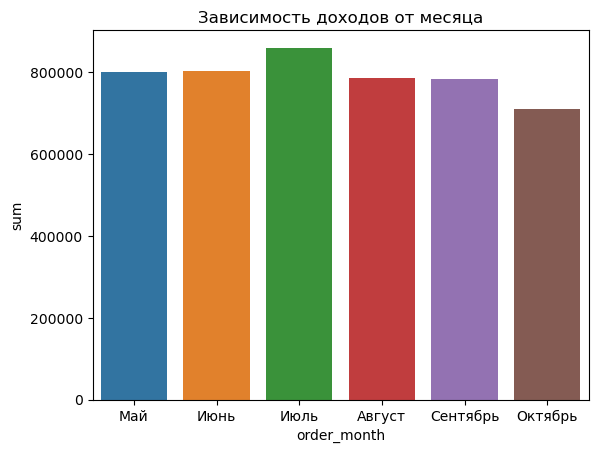

In [492]:
ax = sns.barplot(x='order_month', y='sum', data=profit)
plt.title('Зависимость доходов от месяца')

In [493]:
df.query("order_month == '09' and status != 'ПРОСРОЧЕНО'").groupby(['sale'], as_index=False).agg({'sum': sum}).sort_values('sum')

,sale,sum
4,Михайлов,4268.70
7,Соколов,35183.50
1,Васильев,45416.75
8,Филимонова,59514.47
3,Кузнецова,72228.40
2,Иванов,94770.60
5,Петрова,119724.86
0,Андреев,130983.80
6,Смирнов,221525.70


In [494]:
df.query("order_month == '10'").groupby(['new_current']).agg({'new_current': 'count'})

,new_current
new_current,
новая,36
текущая,99


In [495]:
df.query("order_month == '05' and receiving_month == '06'").agg({'order_month': 'count'})

order_month    77
dtype: int64

In [496]:
salers = df.query("(status != 'ПРОСРОЧЕНО') and (new_current == 'новая' and status == 'ОПЛАЧЕНО' or new_current == 'текущая') and document == 'оригинал' and order_month < '07' and (receiving_month > '07' or receiving_month == '07' and receiving_day != '01')")

In [497]:
salers_bonus_1 = salers.query("new_current == 'новая'")

In [498]:
salers_bonus_2 = salers.query("new_current == 'текущая'")

In [501]:
salers_bonus_1['sale_bonus'] = salers_bonus_1['sum'].apply(sale_bonus)
salers_bonus_2['sale_bonus'] = salers_bonus_2['sum'].apply(sale_bonus)
bonus_1 = salers_bonus_1.groupby('sale').agg({'sale_bonus': sum})
bonus_2 = salers_bonus_2.groupby('sale').agg({'sale_bonus': sum})
bonus = bonus_2.merge(bonus_1, how='outer', on='sale')
bonus['sale_bonus_y'] = bonus['sale_bonus_y']. fillna (0)
bonus['bonus'] = bonus.sale_bonus_x + bonus.sale_bonus_y
bonus = bonus.drop(['sale_bonus_x', 'sale_bonus_y'], axis='columns') 

C:\Users\Aleksandr\AppData\Local\Temp\ipykernel_7744\2937595411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salers_bonus_1['sale_bonus'] = salers_bonus_1['sum'].apply(sale_bonus)
C:\Users\Aleksandr\AppData\Local\Temp\ipykernel_7744\2937595411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salers_bonus_2['sale_bonus'] = salers_bonus_2['sum'].apply(sale_bonus)


In [502]:
bonus.head(10)
# котракты, полученные 01.07.2021 не были включены, так как выплаты за них были выплачены сразу при наступлении дня.

,bonus
sale,
Андреев,7002.1133
Васильев,2169.7690
Иванов,9990.6870
Кузнецова,9903.0281
Петрова,19157.9486
Селиванов,6578.7260
Смирнов,10618.4820
Соколов,628.1590
Филимонова,4438.6111
